In [1]:
# import important library
import numpy as np
import tensorflow as tf
from keras.layers import Activation,Dense,Flatten
from keras.layers import Conv2D,MaxPooling2D

In [2]:
# re-shaping all images into 224*224
image_size = [224,224]

In [3]:
# get a data from images
# for train data 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True)
train_set = train_datagen.flow_from_directory('Dataset/train',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 416 images belonging to 2 classes.


In [4]:
# for test data
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('Dataset/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 134 images belonging to 2 classes.


In [5]:
# import vgg19 library
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19(input_shape=image_size + [3] ,include_top = False)

In [6]:
# we dont train existing weight
for layer in vgg19.layers:
    layer.trainable = False

In [7]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
# Find output classes 
from glob import glob
folder = glob('Dataset/train/*')
folder

['Dataset/train\\Parasite', 'Dataset/train\\Uninfected']

In [9]:
x = Flatten()(vgg19.output)

In [10]:
prediction = Dense(len(folder), activation = 'softmax')(x)

In [11]:
# import model to create model
from tensorflow.keras.models import Model
from keras.models import Sequential
model = Model(inputs = vgg19.input , outputs = prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
### Create Model  using CNN
model = Sequential()
model.add(Conv2D(filters = 16,input_shape = (224,224,3),kernel_size = 2,activation = 'relu' , padding  = 'same'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 32,padding = 'same',kernel_size = 2,activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 64,padding = 'same',kernel_size = 2,activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)            

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
 m = model.fit(train_set, validation_data=test_set,epochs=10,steps_per_epoch=len(train_set),validation_steps=len(test_set))

Epoch 1/10
13/13 [==============================] - 8s 578ms/step - loss: 0.3258 - accuracy: 0.8774 - val_loss: 0.6440 - val_accuracy: 0.6194
Epoch 2/10
13/13 [==============================] - 9s 706ms/step - loss: 0.2544 - accuracy: 0.9038 - val_loss: 0.9233 - val_accuracy: 0.6642
Epoch 3/10
13/13 [==============================] - 8s 625ms/step - loss: 0.2638 - accuracy: 0.9062 - val_loss: 0.4691 - val_accuracy: 0.7537
Epoch 4/10
13/13 [==============================] - 11s 763ms/step - loss: 0.1799 - accuracy: 0.9423 - val_loss: 0.6606 - val_accuracy: 0.7537
Epoch 5/10
13/13 [==============================] - 11s 818ms/step - loss: 0.1483 - accuracy: 0.9519 - val_loss: 0.3549 - val_accuracy: 0.8358
Epoch 6/10
13/13 [==============================] - 10s 766ms/step - loss: 0.1427 - accuracy: 0.9615 - val_loss: 0.3488 - val_accuracy: 0.8507
Epoch 7/10
13/13 [==============================] - 10s 741ms/step - loss: 0.1226 - accuracy: 0.9591 - val_loss: 0.3066 - val_accuracy: 0.8657
Ep

In [41]:
# import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

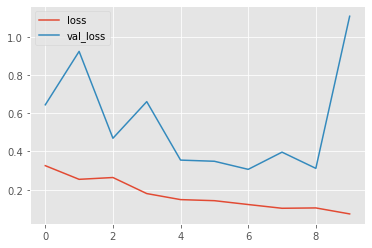

In [45]:
# plot the loss
plt.plot(m.history['loss'],label ='loss')
plt.plot(m.history['val_loss'], label = 'val_loss')
plt.legend()

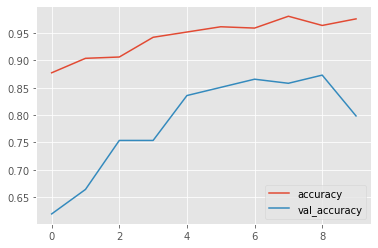

In [46]:
# plot the accuracy
plt.plot(m.history['accuracy'],label ='accuracy')
plt.plot(m.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [47]:
y_pred = model.predict(test_set)

In [48]:
y_pred

array([[5.32886326e-01, 4.67113703e-01],
       [9.99995708e-01, 4.30725049e-06],
       [9.99247849e-01, 7.52105378e-04],
       [9.95830119e-01, 4.16985666e-03],
       [1.00000000e+00, 7.19822335e-09],
       [2.21702933e-01, 7.78297067e-01],
       [9.93219912e-01, 6.78012753e-03],
       [1.00000000e+00, 2.53059210e-19],
       [1.18259244e-01, 8.81740749e-01],
       [9.99928474e-01, 7.15208371e-05],
       [1.03137821e-01, 8.96862209e-01],
       [9.99729335e-01, 2.70708028e-04],
       [9.99932051e-01, 6.79986406e-05],
       [9.99948502e-01, 5.14550193e-05],
       [7.57071525e-02, 9.24292803e-01],
       [1.67453453e-01, 8.32546532e-01],
       [9.87595081e-01, 1.24049615e-02],
       [9.99999881e-01, 1.71484075e-07],
       [1.89140588e-01, 8.10859382e-01],
       [3.49926859e-01, 6.50073111e-01],
       [9.99992132e-01, 7.83112318e-06],
       [8.85878086e-01, 1.14121929e-01],
       [9.99978662e-01, 2.13163294e-05],
       [1.71750356e-02, 9.82824981e-01],
       [9.992922

In [49]:
# save the model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [50]:
# test loaded model 
from keras.preprocessing import image
img = image.load_img('Dataset/test/Parasite/q.png',target_size=(224,224))

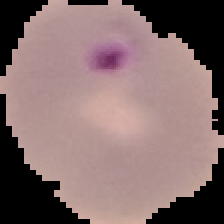

In [51]:
img

In [52]:
img = image.img_to_array(img)
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [53]:
img.shape

(224, 224, 3)

In [54]:
img = img/255

In [55]:
x = np.expand_dims(img,axis = 0)

In [56]:
x.shape

(1, 224, 224, 3)

In [57]:
model.predict(x)

array([[9.9998474e-01, 1.5242703e-05]], dtype=float32)

In [58]:
a = np.argmax(model.predict(x),axis = 1)

In [59]:
# check image 
if a == 1 :
    print('Uninfected')
else:
    print('Infected')

Infected
